<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# # Project 2 - Ames Housing Data and Kaggle Challenge



---

### Objective
I am tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

# Data Cleaning and Outliers


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

%matplotlib inline


In [71]:
train_df = pd.read_csv("../project_2/datasets/train.csv")
test_df = pd.read_csv("../project_2/datasets/test.csv")

In [72]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [73]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [74]:
train_df.shape

(2051, 81)

In [75]:
test_df.shape

(879, 80)

In [76]:
train_df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [77]:
test_df.describe()           ### Using test_df.describe().T would transpose this and make it more readable.

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,879.000000,8.790000e+02,879.000000,719.000000,879.000000,879.000000,879.000000,879.000000,879.000000,878.000000,...,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,1445.588168,7.165050e+08,58.270762,69.630042,10340.920364,6.054608,5.565415,1970.533561,1984.444824,106.982916,...,470.832765,93.560865,47.478953,24.037543,2.594994,14.813424,1.882821,48.443686,6.207053,2007.824801
std,850.717105,1.889135e+08,42.211389,23.625372,10047.335167,1.374756,1.128422,30.403527,20.454546,188.356829,...,213.070155,121.174306,69.209179,73.212237,24.948416,52.975963,29.899698,549.858353,2.644097,1.327396
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.500000,5.284861e+08,20.000000,59.000000,7298.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,323.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1435.000000,5.354542e+08,50.000000,68.000000,9453.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,...,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071921e+08,70.000000,80.000000,11606.500000,7.000000,6.000000,2000.000000,2003.000000,173.500000,...,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,...,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [78]:
# Check for nulls
null = train_df.isnull().sum()
null[null > 0].sort_values(ascending=False)  ### Good. 

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [79]:
# Check for nulls
null_2 = train_df.isnull().sum()
null_2[null_2 > 0].sort_values(ascending=False)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [80]:
#Columns of Pool QC, Misc Feature, Alley, Fence and Fireplace Qu  has a large number of null values
#Indicating houses in absence of these facilities.
#Let's filled them with None

none_list = ["Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu"]

train_df[none_list] = train_df[none_list].fillna('None')
test_df[none_list] = test_df[none_list].fillna('None')

In [81]:
#Garage Type : Garage location
#Garage Finish : Interior finish of the garage
#Garage Qual : Garage quality
#Garage Cond : Garage condition
#Bsmt Qual : Evaluates the height of the basement
#Bsmt Cond : Evaluates the general condition of the basement
#Bsmt Exposure : Refers to walkout or garden level walls
#BsmtFin Type 1 : Rating of basement finished area
#BsmtFinType 2 : Rating of basement finished area (if multiple types)
#Missing values indicates the houses in absence of garage/basement
#Let's filled them with 0

zero_list = ['Garage Type','Garage Finish','Garage Qual','Garage Cond', 'Garage Cars', 'Bsmt Qual',
           'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']

train_df[zero_list] = train_df[zero_list].fillna(0)
test_df[zero_list] = test_df[zero_list].fillna(0)

In [82]:
#BsmtFin SF 1 : Type 1 finished square feet
#BsmtFin SF 2 : Type 2 finished square feet
#Bsmt Unf SF : Unfinished square feet of basement area
#Bsmt Full Bath : Basement full bathrooms
#Bsmt Half Bath : Basement half bathrooms
#Missing values indicates the houses in absence of basement 
#Let's fill them with 0

zero_list_2 = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Bsmt Full Bath','Bsmt Half Bath']

train_df[zero_list_2] = train_df[zero_list_2].fillna(0)
test_df[zero_list_2] = test_df[zero_list_2].fillna(0)

In [83]:
#For Garage Yr Blt', NA means it is yet to built.
#It cannot be filled with None as the feature will become an object
#It cannot be filled with zero as it would seem to be bulit in year 0
#Let's fill it as same as the year the house was built

train_df.update(train_df['Garage Yr Blt'].fillna(train_df['Year Built']))
test_df.update(test_df['Garage Yr Blt'].fillna(test_df['Year Built']))

In [84]:
#Mas Vnr Type : Masonry veneer type
#Missing values indicates the houses in absence of masonry
#Let's filled them with None

train_df['Mas Vnr Type'] = train_df['Mas Vnr Type'].fillna('None') ### it's easier to concaternate the two DataFrames
test_df['Mas Vnr Type'] = test_df['Mas Vnr Type'].fillna('None')   ### together and clean them simultaneously.

In [85]:
#Mas Vnr Area : Masonry veneer area in square feet
#Missing values indicates the houses in absence of masonry 
#Let's filled them with with median value 

train_df.update(train_df['Mas Vnr Area'].fillna(train_df['Mas Vnr Area'].median()))     ### No masonry -> zero?
test_df.update(test_df['Mas Vnr Area'].fillna(test_df['Mas Vnr Area'].median()))                                                         

In [86]:
#Lot Frontage : Linear feet of street connected to property 
#Missing values indicates the houses in absence of lot area
#Let's filled them with with median value 

train_df.update(train_df['Lot Frontage'].fillna(train_df['Lot Frontage'].median()))
test_df.update(test_df['Lot Frontage'].fillna(test_df['Lot Frontage'].median()))  

In [87]:
#Total Bsmt SF (Continuous): Total square feet of basement area
#Missing values can be calcuated from its base columns
#Let's fill 'Total Bsmt SF' with the sum of SF, SF1, SF2

train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].fillna(train_df['Bsmt Unf SF'] + train_df['BsmtFin SF 1'] + train_df['BsmtFin SF 2'])
test_df['Total Bsmt SF'] = test_df['Total Bsmt SF'].fillna(test_df['Bsmt Unf SF'] + test_df['BsmtFin SF 1'] + test_df['BsmtFin SF 2'])

In [88]:
#Garage Area : Size of garage in square feet
#Let's fill them with median()

train_df['Garage Area'] = train_df['Garage Area'].fillna(train_df['Garage Area'].median())   ### NAs could mean no garages?
test_df['Garage Cars'] = test_df['Garage Cars'].fillna(test_df['Garage Cars'].mean())        ### NAs could mean no garage

In [89]:
null = train_df.isnull().sum()
null[null > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [90]:
null_2 = test_df.isnull().sum()
null_2[null_2 > 0].sort_values(ascending=False)

Electrical    1
dtype: int64

In [91]:
#Electrical : Electrical system
#Missing value seems to indicate randomly missing
#Let's fill it with 0

test_df['Electrical'] = test_df['Electrical'].fillna(0)   ### Could have used the mode of the field. 

In [92]:
null_2 = test_df.isnull().sum()
null_2[null_2 > 0].sort_values(ascending=False)

Series([], dtype: int64)

# Exploratory Data Visualizations (EDA)

In [93]:
# All continuous variables
numeric_cols = [col for col in train_df.columns if train_df[col].dtype != "object"]
print(numeric_cols)

['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [94]:
# All categorical variables (both ordinal and nominal)
object_cols = [col for col in train_df.columns if train_df[col].dtype == "object"]

# All ordinal variables
ordinal_cols = ['Exter Qual','Exter Cond','Heating QC','Bsmt Qual','Bsmt Cond','Kitchen Qual','Garage Qual',
                'Garage Cond','BsmtFin Type 1','BsmtFin Type 2','Garage Finish','Paved Drive','Central Air',
                'Bsmt Exposure','Lot Shape','Electrical','Functional','Land Slope','Utilities','Overall Qual', 
                'Overall Cond']
print(ordinal_cols)

['Exter Qual', 'Exter Cond', 'Heating QC', 'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Garage Qual', 'Garage Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Finish', 'Paved Drive', 'Central Air', 'Bsmt Exposure', 'Lot Shape', 'Electrical', 'Functional', 'Land Slope', 'Utilities', 'Overall Qual', 'Overall Cond']


In [95]:
# All nominal variables (object_cols - ordinal_cols)
nominal_cols = list(set(object_cols) - set(ordinal_cols))
print(nominal_cols)

['Bldg Type', 'Street', 'Mas Vnr Type', 'Exterior 2nd', 'Neighborhood', 'Lot Config', 'Roof Style', 'Land Contour', 'Heating', 'Exterior 1st', 'Sale Type', 'Alley', 'Garage Type', 'Fence', 'MS Zoning', 'Foundation', 'Condition 2', 'Fireplace Qu', 'Condition 1', 'House Style', 'Roof Matl', 'Pool QC', 'Misc Feature']


## EDA: Plot a Heatmap of the Correlation Matrix

(39.0, 0.0)

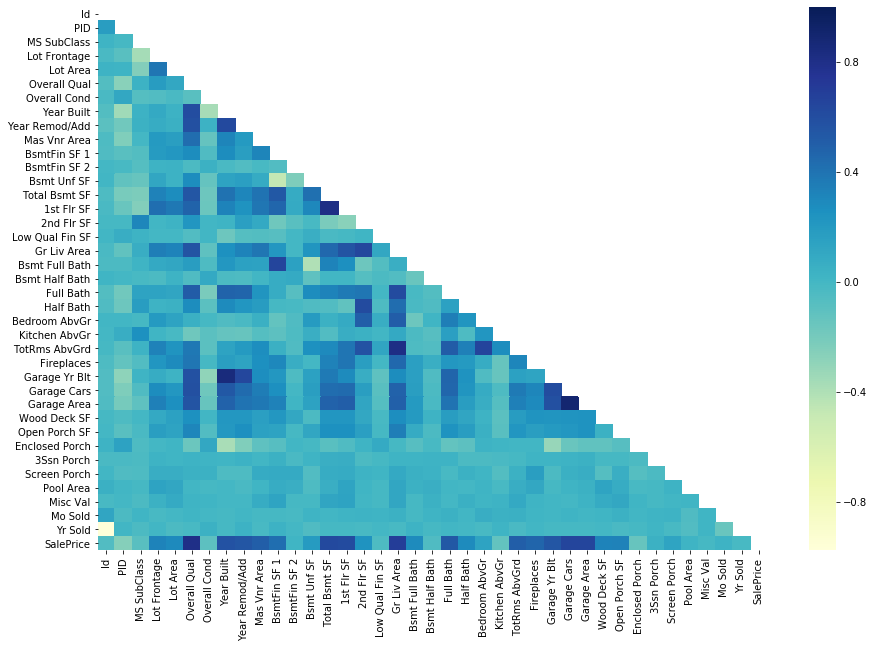

In [96]:
plt.figure(figsize = (15,10))             ### Maybe increase the dpi here since the text is small and the figure big.
mask = np.zeros(train_df.corr().shape)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(train_df.corr(),mask=mask, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
### Very good. 

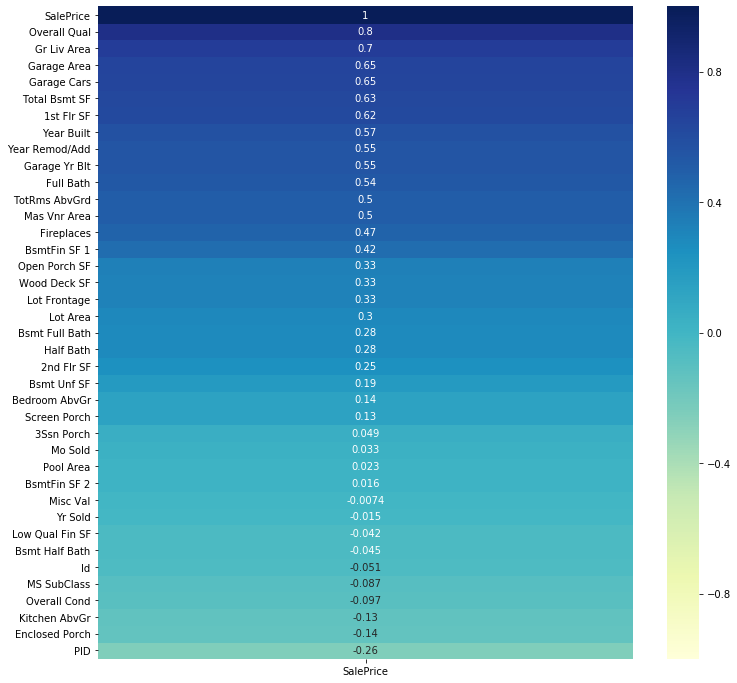

In [97]:
# Several features with top correlation with SalePrice
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values('SalePrice'),
            vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.invert_yaxis()

In [98]:
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650241
Garage Cars        0.647781
Total Bsmt SF      0.629303
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Garage Yr Blt      0.550324
Full Bath          0.537969
TotRms AbvGrd      0.504014
Mas Vnr Area       0.503579
Fireplaces         0.471093
BsmtFin SF 1       0.423856
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.325129
Lot Area           0.296566
Bsmt Full Bath     0.283332
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190861
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016432
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045290
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

Selecting features that has a correlation of more than 0.5 with SalePrice:

1. Overall Qual      
2. Gr Liv Area        
3. Garage Area         
4. Garage Cars         
5. Total Bsmt SF       
6. Year Built          
7. Year Remod/Add      
8. Garage Yr Blt       
9. Full Bath           
10. TotRms AbvGrd      
11. Mas Vnr Area       

In [ ]:
### Negative correlation is also makes good predictors, so according to your criteria you should be selecting
### features with abs(correlation) > 0.5

## EDA: Create scatterplots of Continous Variables


In [99]:
df = pd.concat([test_df,train_df],ignore_index=True,sort=False) 
y = df['SalePrice']

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


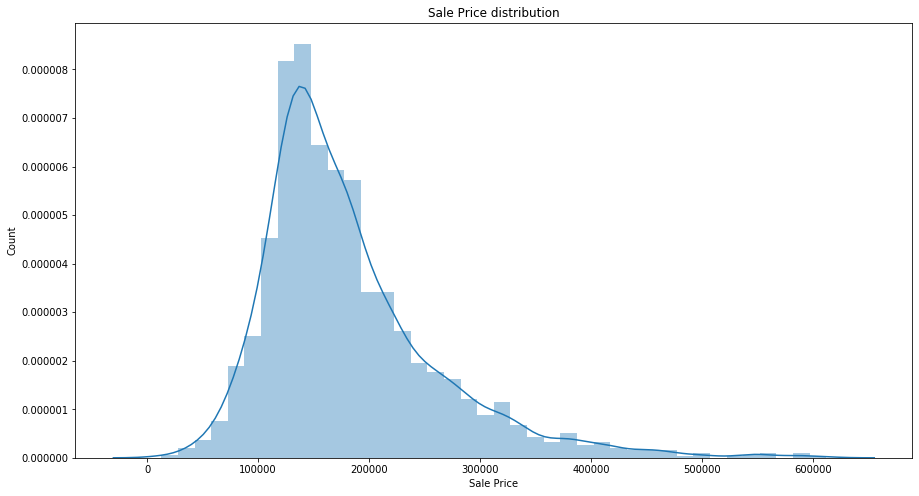

In [100]:
fig, axes = plt.subplots(figsize=(15, 8))
sns.distplot(df['SalePrice'], kde=True, bins=40)\
.set(xlabel='Sale Price', ylabel='Count',title="Sale Price distribution");
plt.show()

### This would be a great justification to apply power transforms since we know that our 
### Current linear regression methods assume that we have something roughly normally 
### distributed in the end (skew correction)

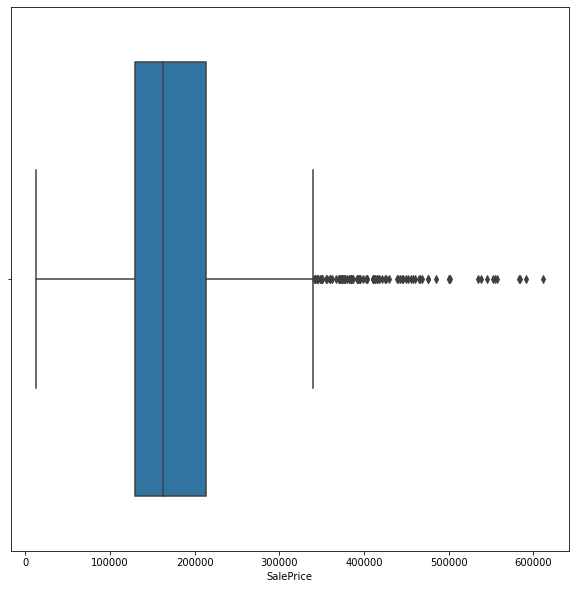

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(df['SalePrice']) 

In [102]:
def subplot_scatter(df,list_of_titles, list_of_xlabels):
    ncols = 4
    nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))
    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            ax = axes[i][j]  
            if counter < len(df.columns):      # Plot when we have data
                ax.scatter(df[df.columns[counter]], y)
                ax.set_xlabel(list_of_xlabels[counter])
                ax.set_title(list_of_titles[counter])
                ax.set_ylabel("Price")
        # Remove axis when we no longer have data
            else:
                ax.set_axis_off()
            counter += 1
    plt.tight_layout()
    plt.show()

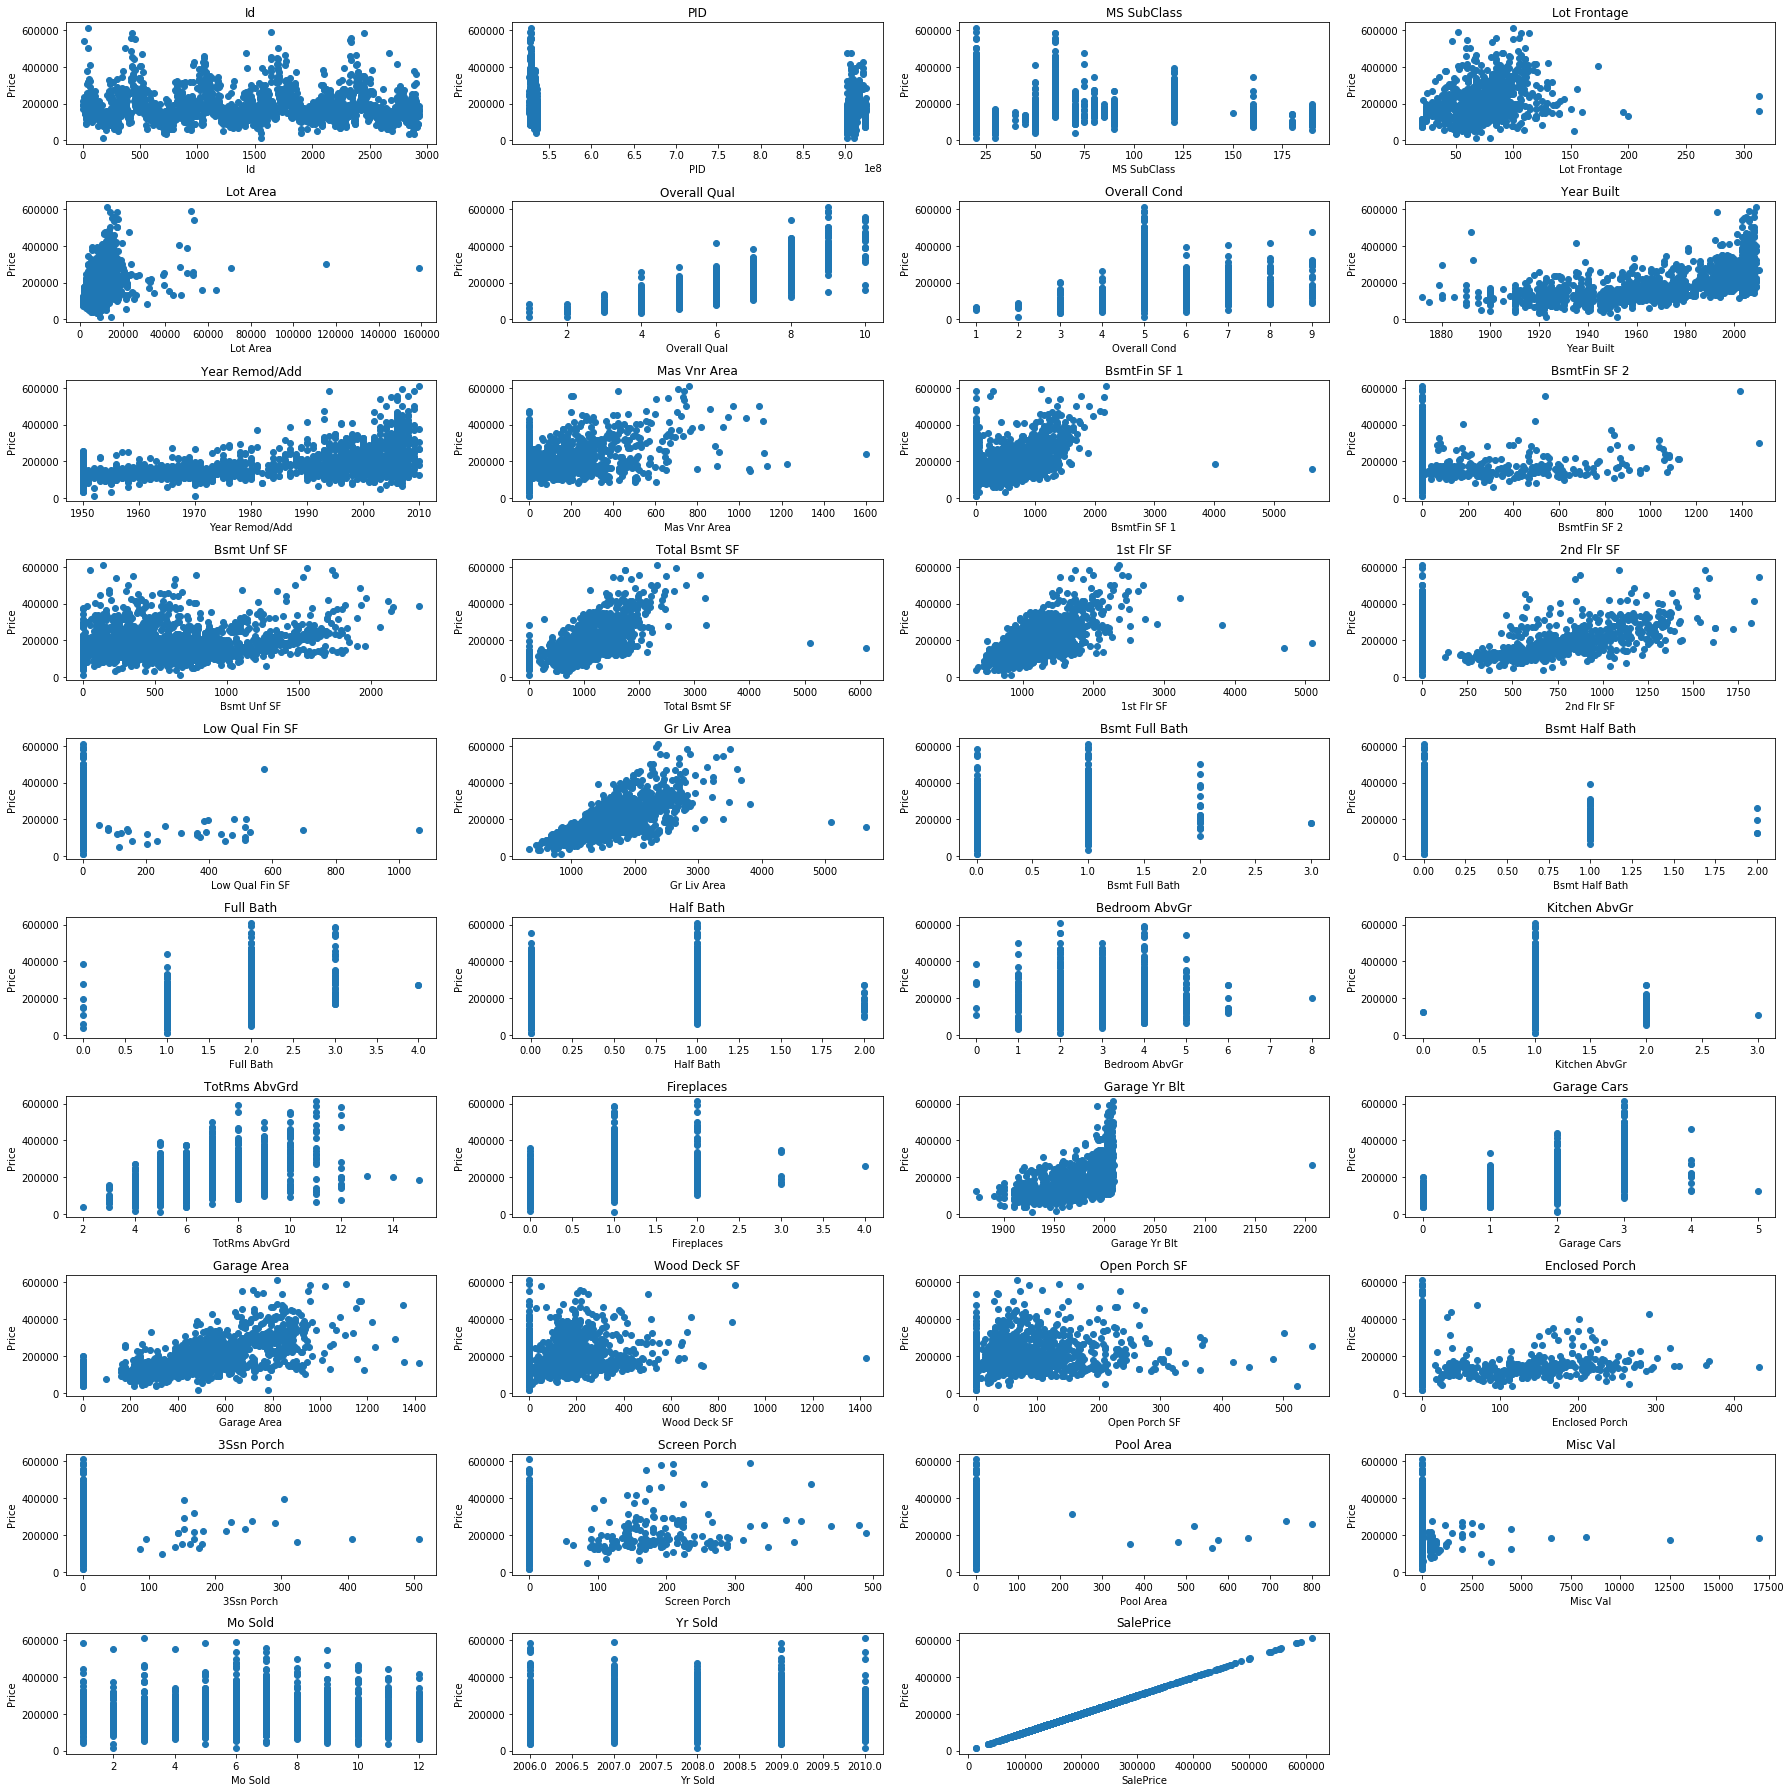

In [103]:
subplot_scatter(df[numeric_cols],numeric_cols,numeric_cols) ### No need to plot id, PID

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


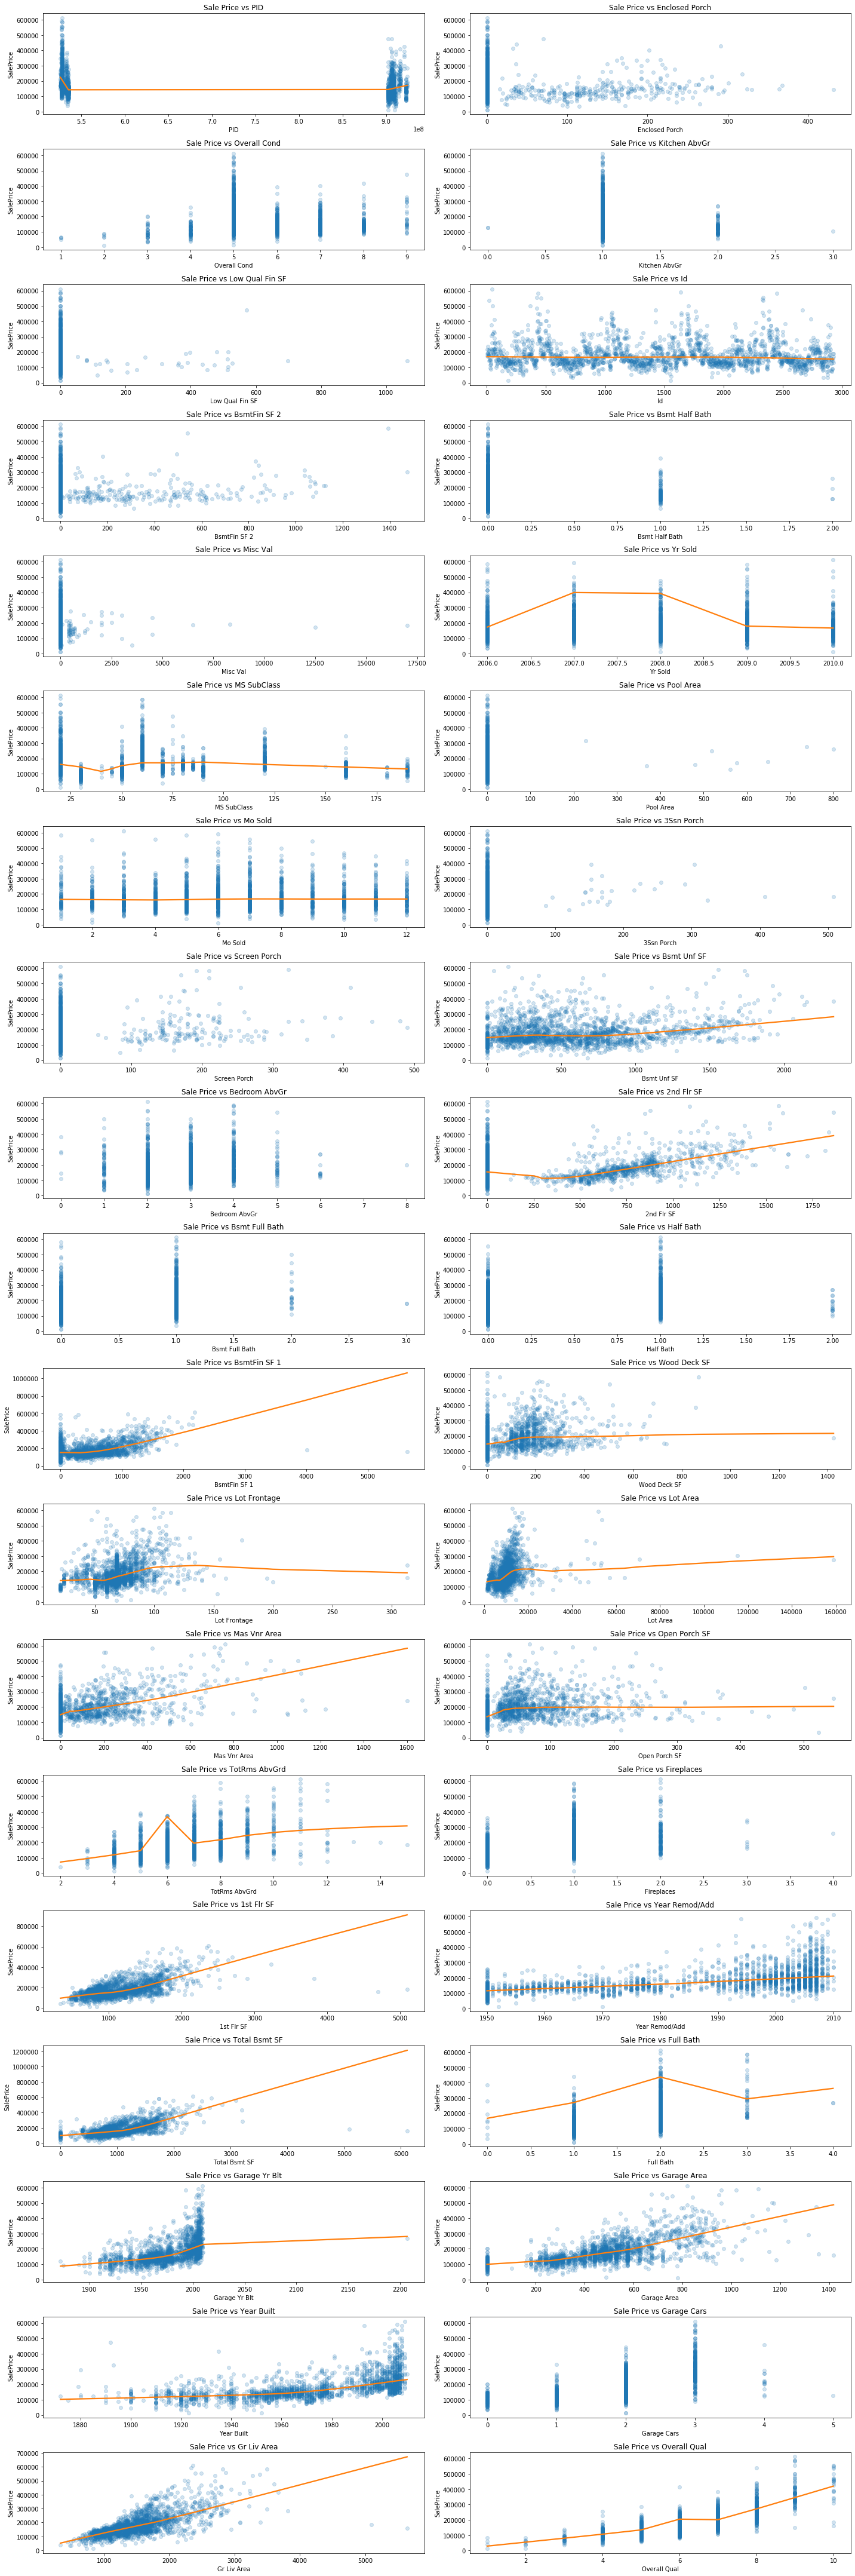

In [104]:
topcorr = df.corr(method = 'spearman')['SalePrice'].sort_values()[:-1]
topcorr = topcorr.head(38)
fig, ax = plt.subplots(19,2, figsize = (20, 60))
ax = ax.ravel()
j = 0
for i in topcorr.index:
    sns.regplot(i, 'SalePrice', ax = ax[j],lowess=True, data = df, color = 'C0', line_kws={"color": "C1"},
               scatter_kws={"alpha": 0.2})         ### orange line not very useful.
    ax[j].set_title("Sale Price vs {}".format(i))
    j += 1
plt.tight_layout()
plt.show()

fig.savefig('test.png', bbox_inches='tight')

##Create boxplots of Categorical Variables (Ordinal)

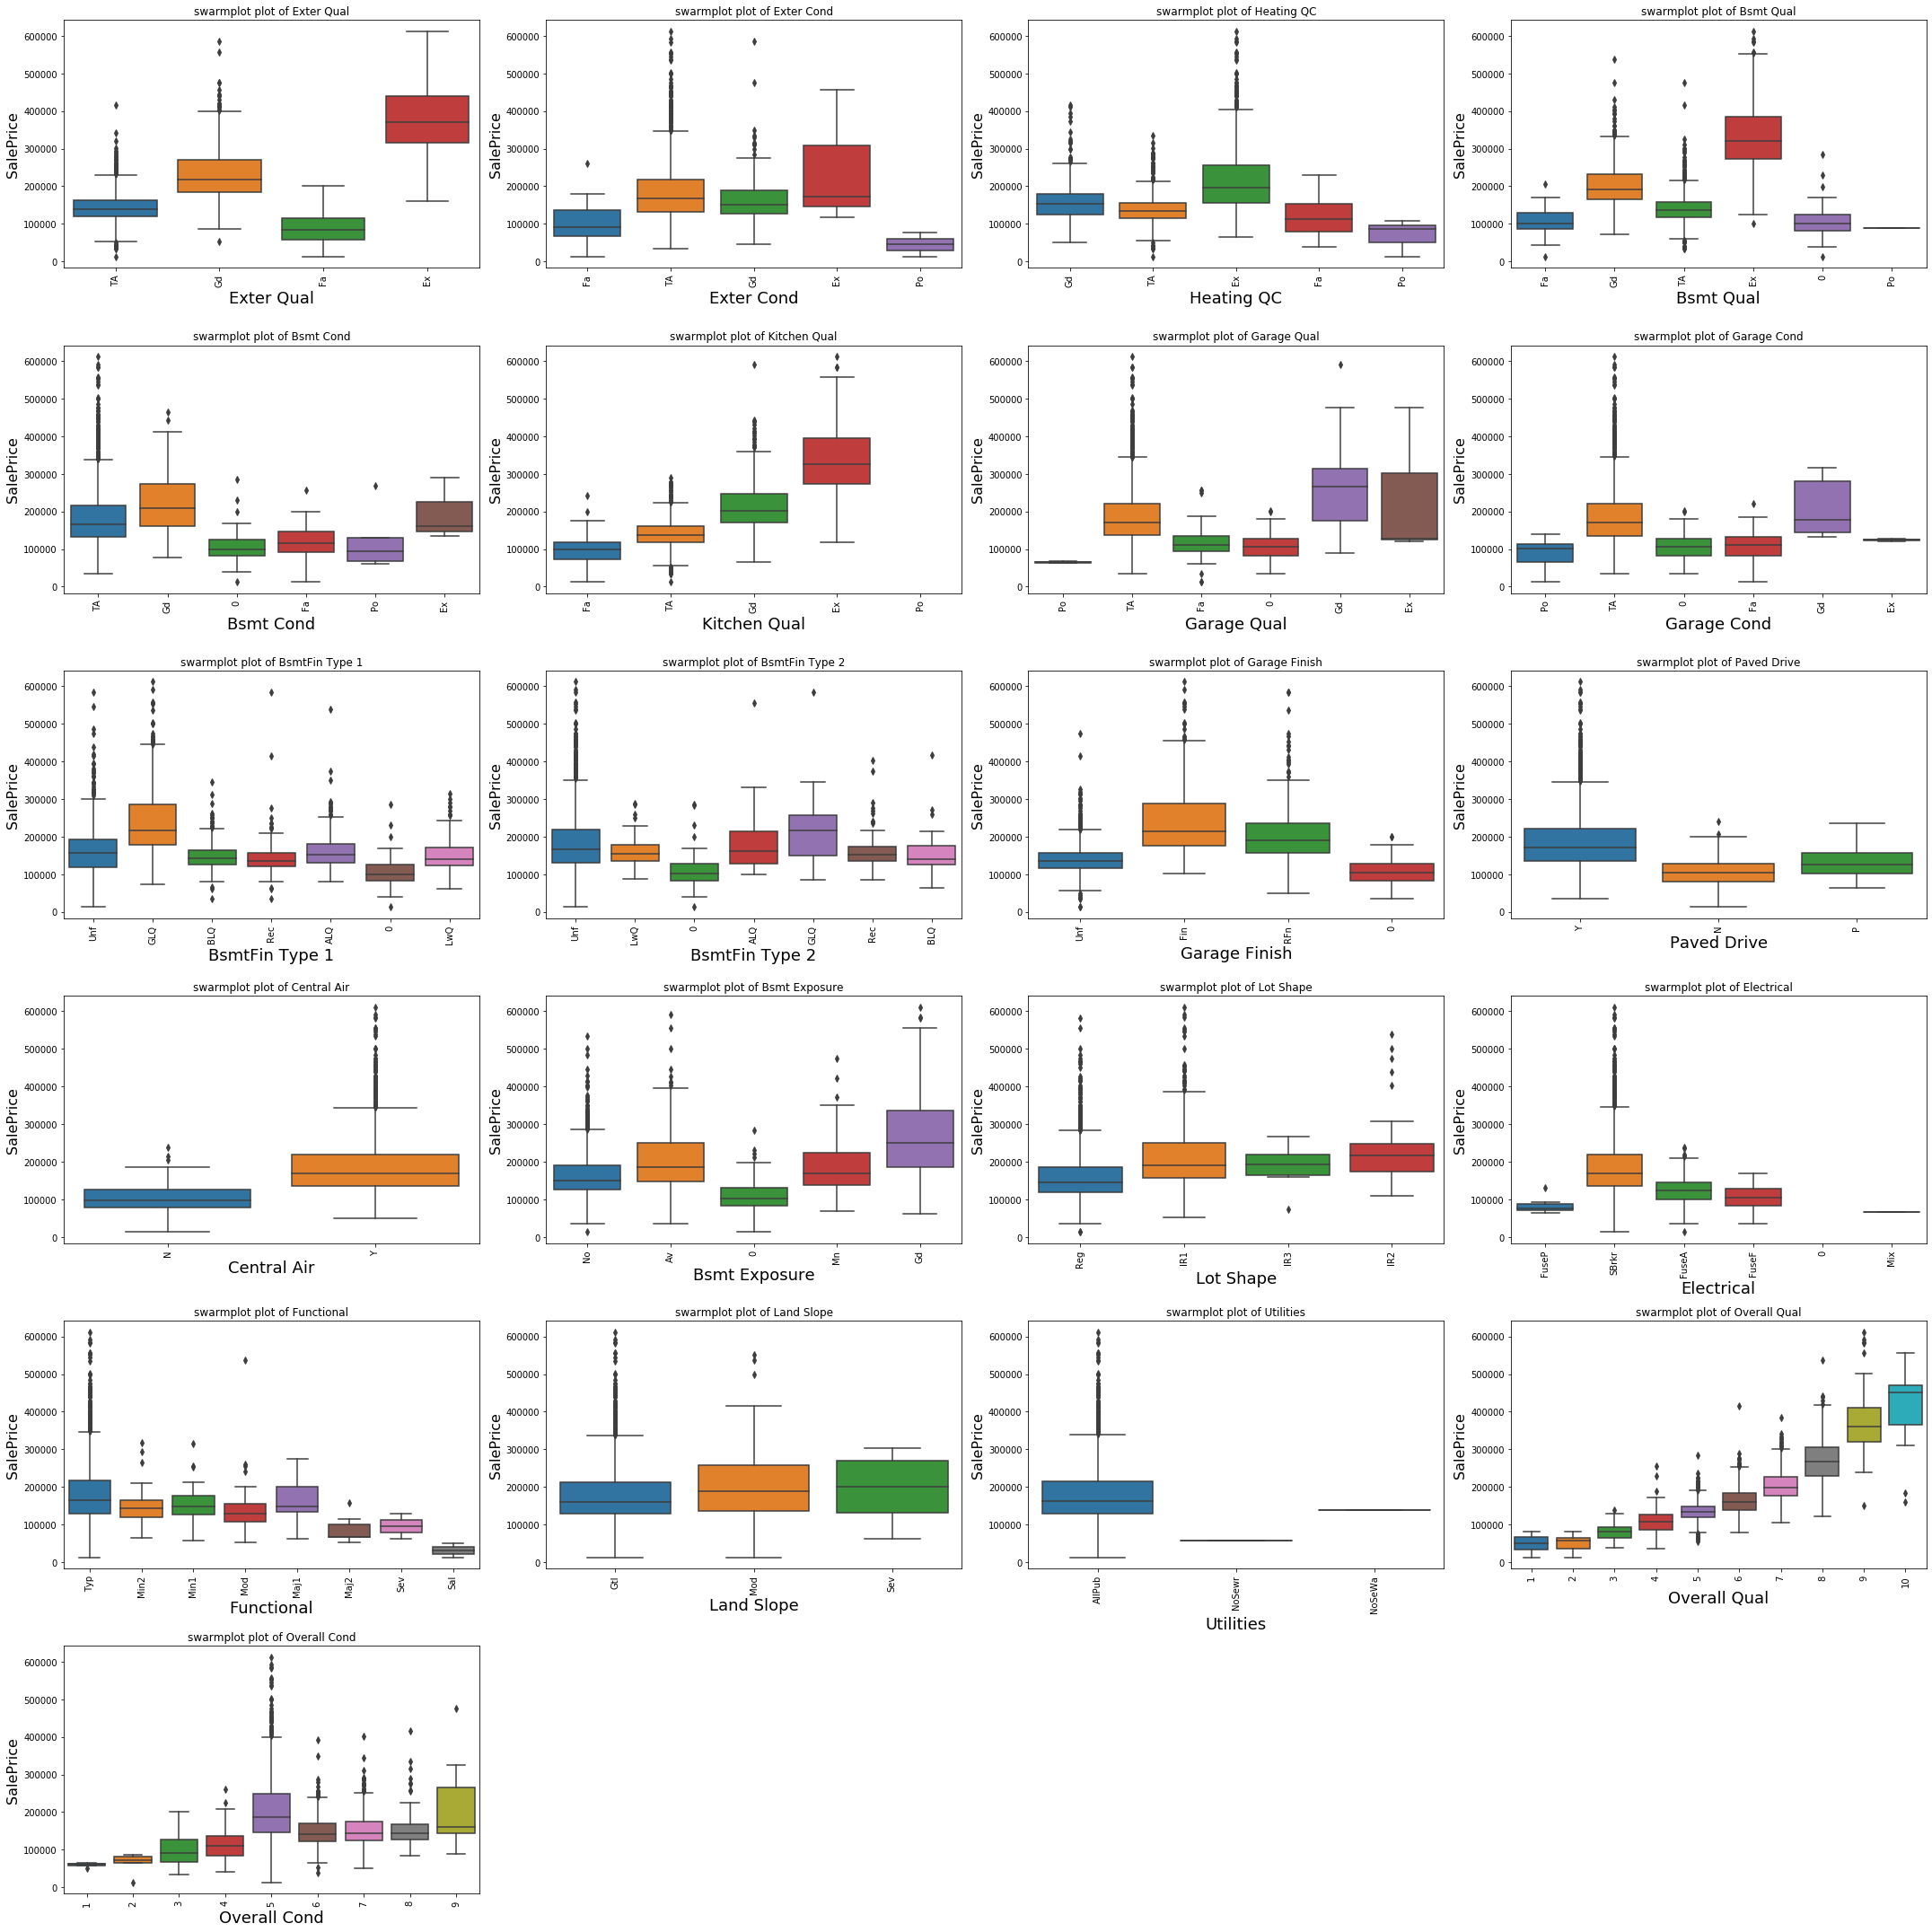

In [105]:
fig = plt.figure(figsize=(30,30))
for i, v in enumerate(ordinal_cols):
    plt.subplot(6,4,i+1)
    sns.boxplot(x=v, y='SalePrice', data=df)
    plt.title('swarmplot plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('SalePrice', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout()

fig.savefig('test_2.png', bbox_inches='tight')

##Create boxplots of Categorical Variables (Nominal)

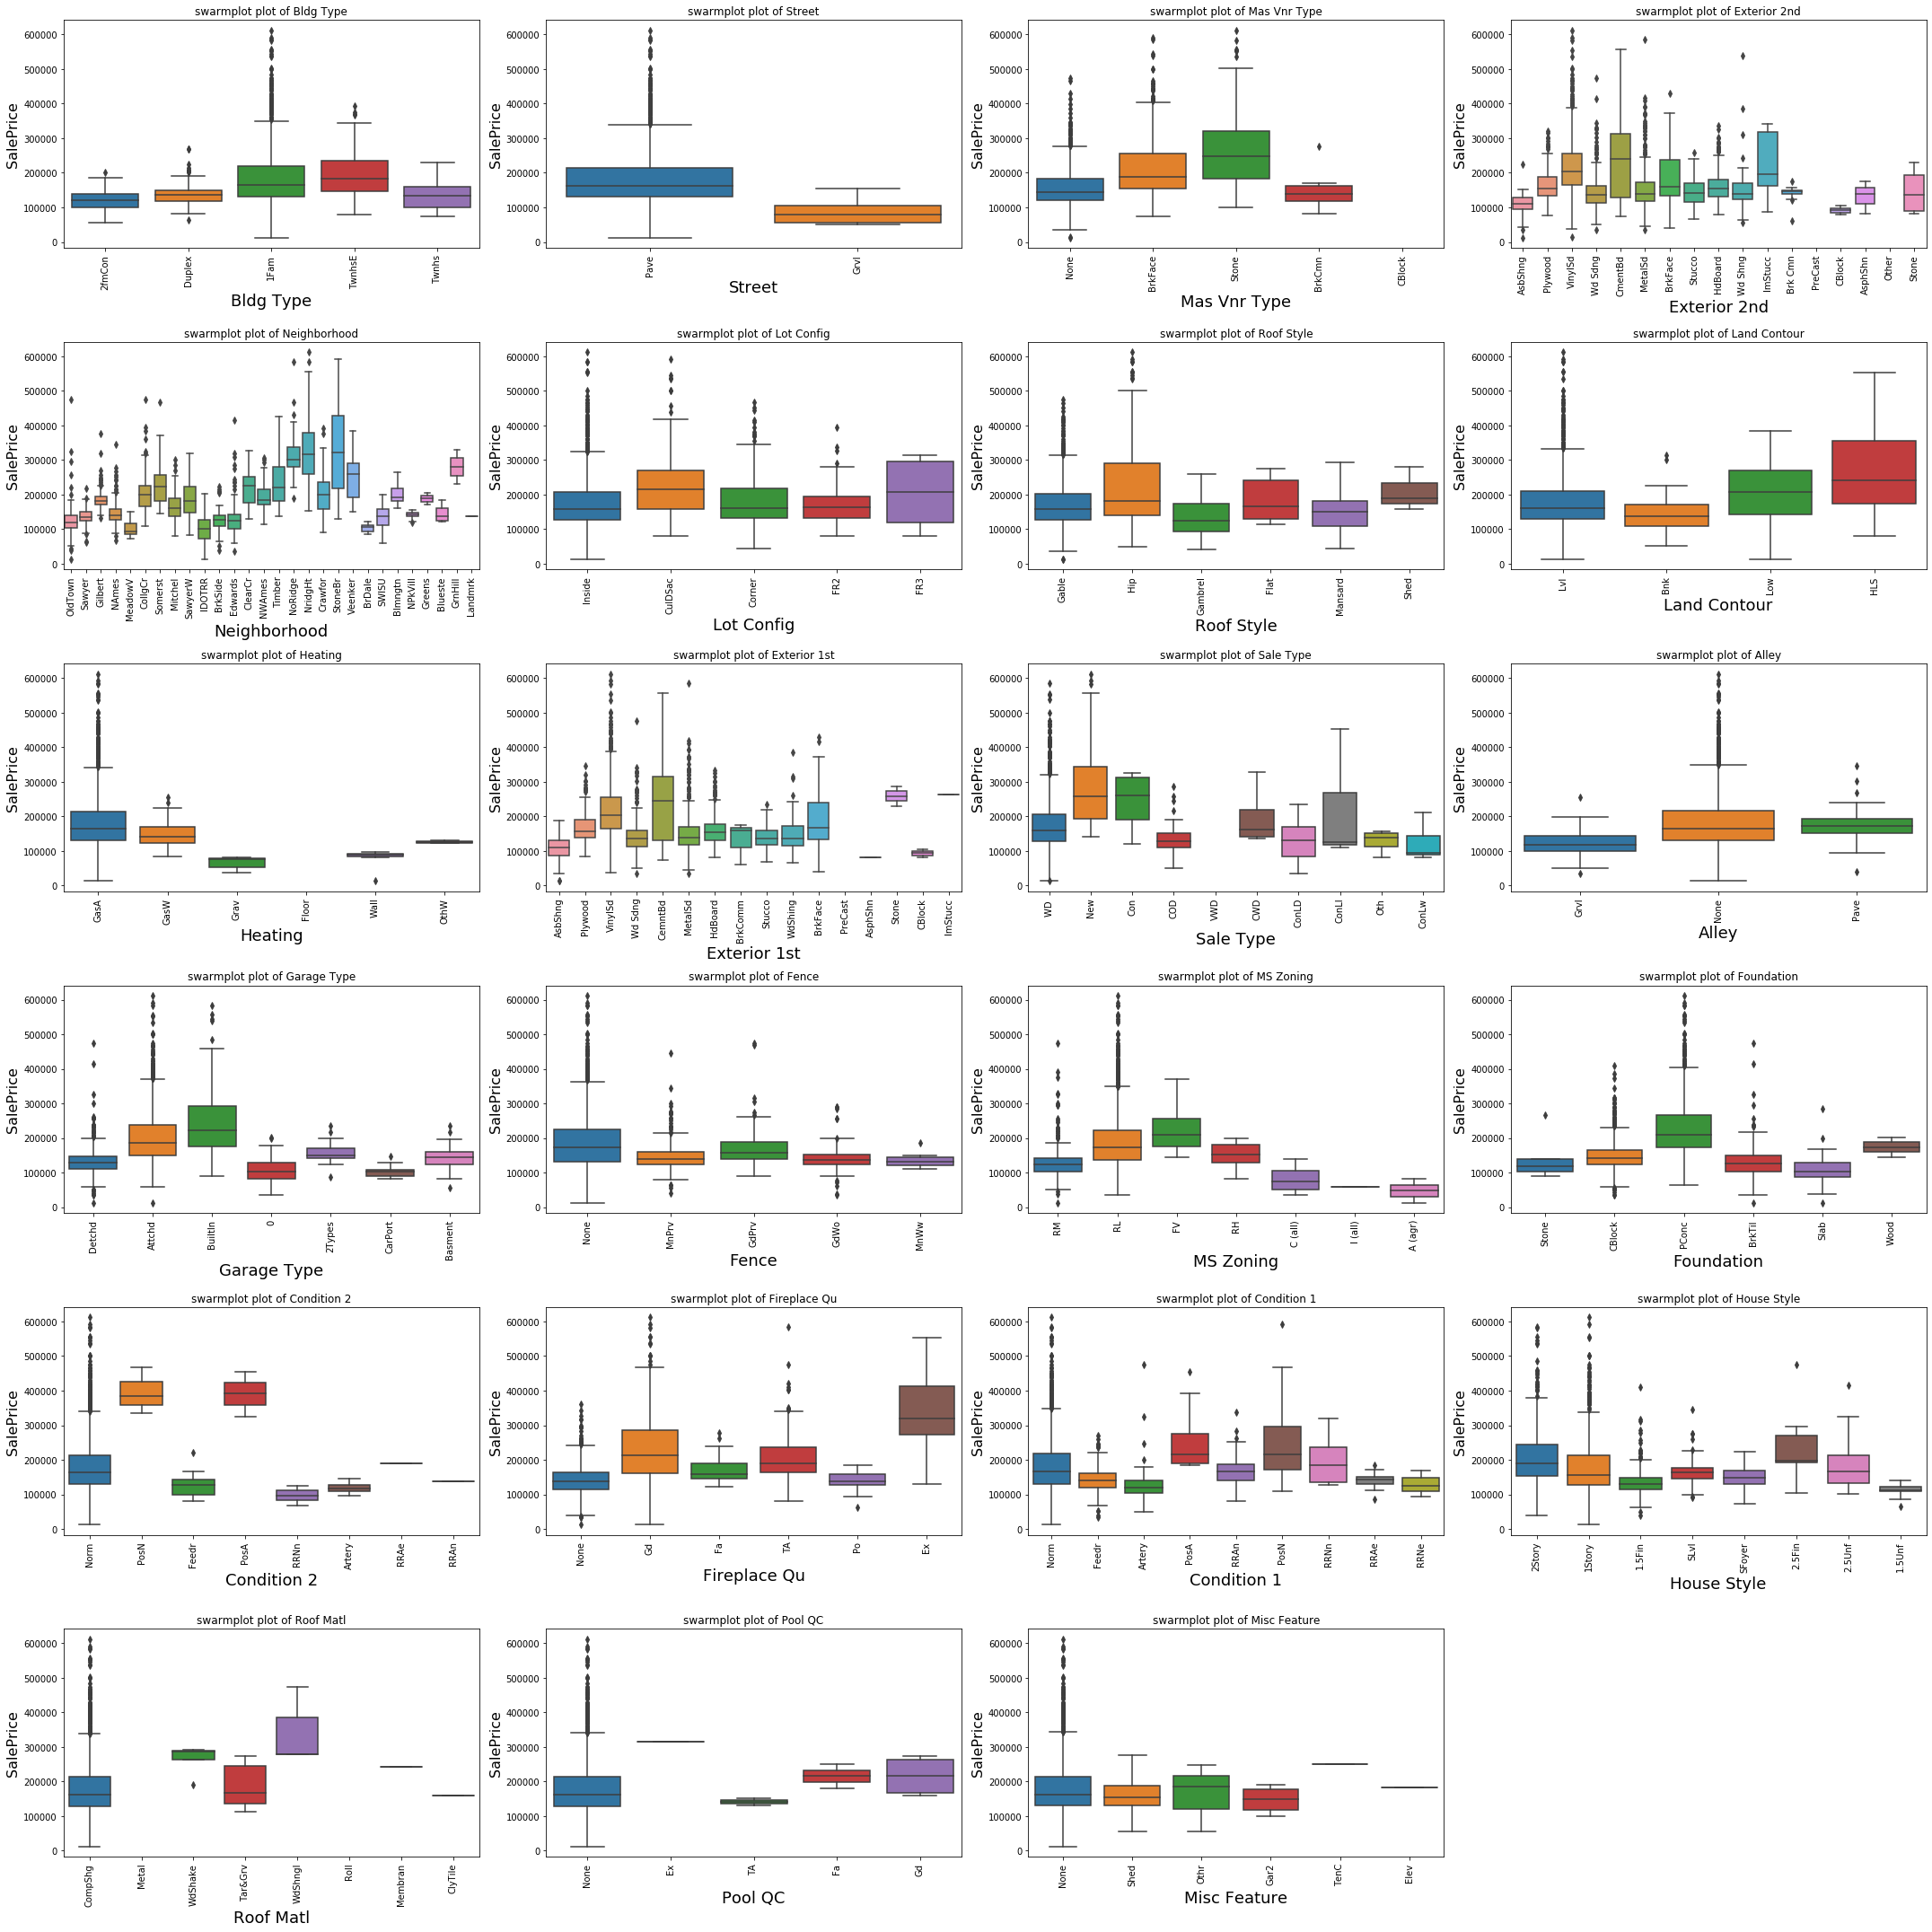

In [106]:
fig = plt.figure(figsize=(30,30))
for i, v in enumerate(nominal_cols):
    plt.subplot(6,4,i+1)
    sns.boxplot(x=v, y='SalePrice', data=df)
    plt.title('swarmplot plot of {}'.format(v)) 
    plt.xlabel(v, fontsize=18)
    plt.ylabel('SalePrice', fontsize=16)
    plt.xticks(rotation='vertical')
plt.tight_layout()

fig.savefig('test_3.png', bbox_inches='tight')

In [107]:
#function to plot a scatter plot
def scatter(df, x , y, hue = None, size=7):
    sns.lmplot(x=x, y=y, data=df, fit_reg=False, hue=hue, size=size, scatter_kws={'marker':'o','alpha':0.7,'s':9}, palette='Set2')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


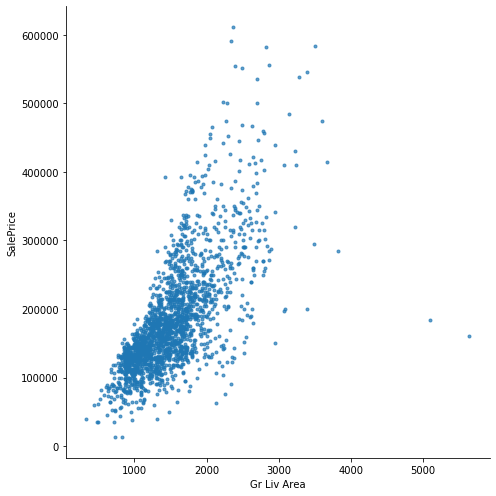

In [108]:
#SalePrice vs Gr Liv Area
scatter(train_df, 'Gr Liv Area', 'SalePrice')

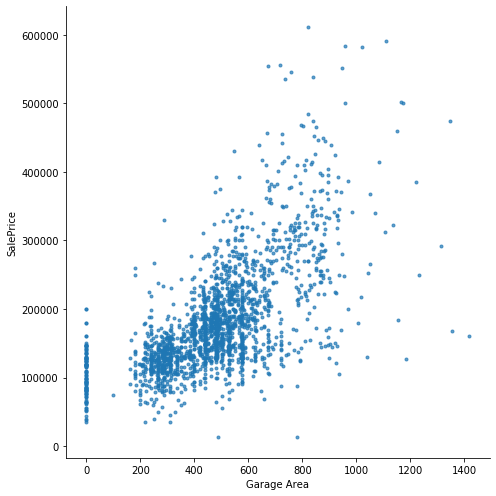

In [109]:
#SalePrice vs Garage Area
scatter(train_df, 'Garage Area', 'SalePrice')

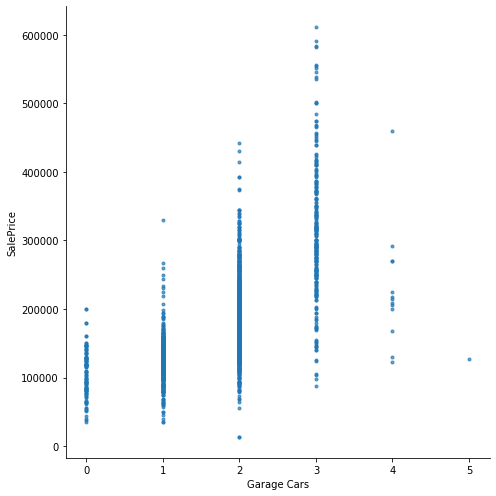

In [110]:
#SalePrice vs Garage Cars
scatter(train_df, 'Garage Cars', 'SalePrice')


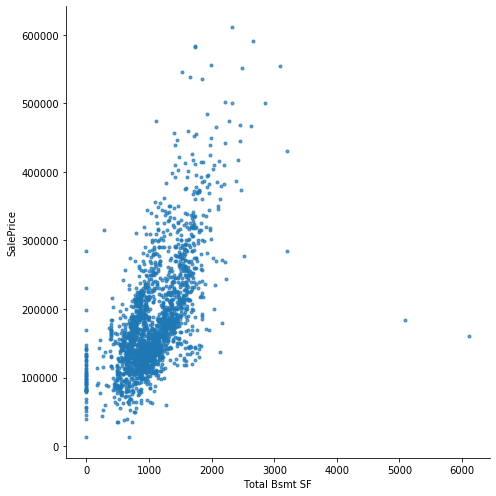

In [111]:
#SalePrice vs Total Bsmt SF
scatter(train_df, 'Total Bsmt SF', 'SalePrice')


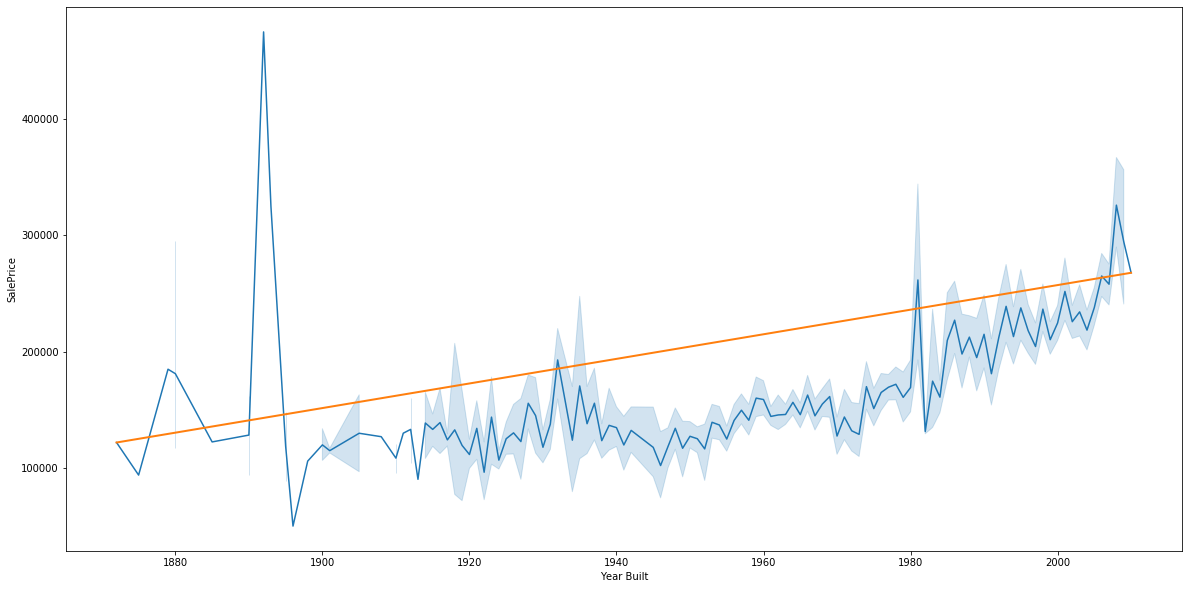

In [112]:
#SalePrice vs Year Built
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = df['Year Built'], y = y)
plt.plot([1872, 2010], [122000, 267916], linewidth=2)
plt.show()                                                ### a lot of anomalies here. Remove before plotting

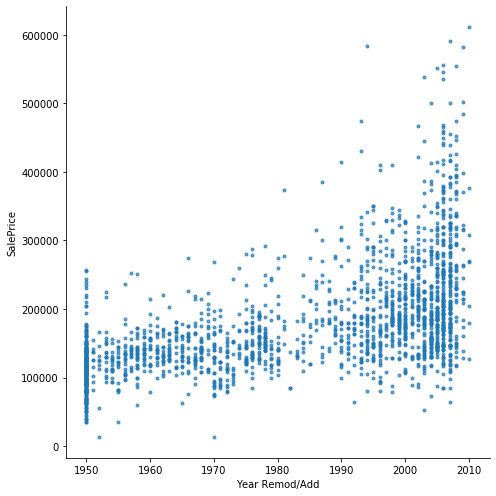

In [113]:
#SalePrice vs Year Remod/Add
scatter(train_df, 'Year Remod/Add', 'SalePrice')

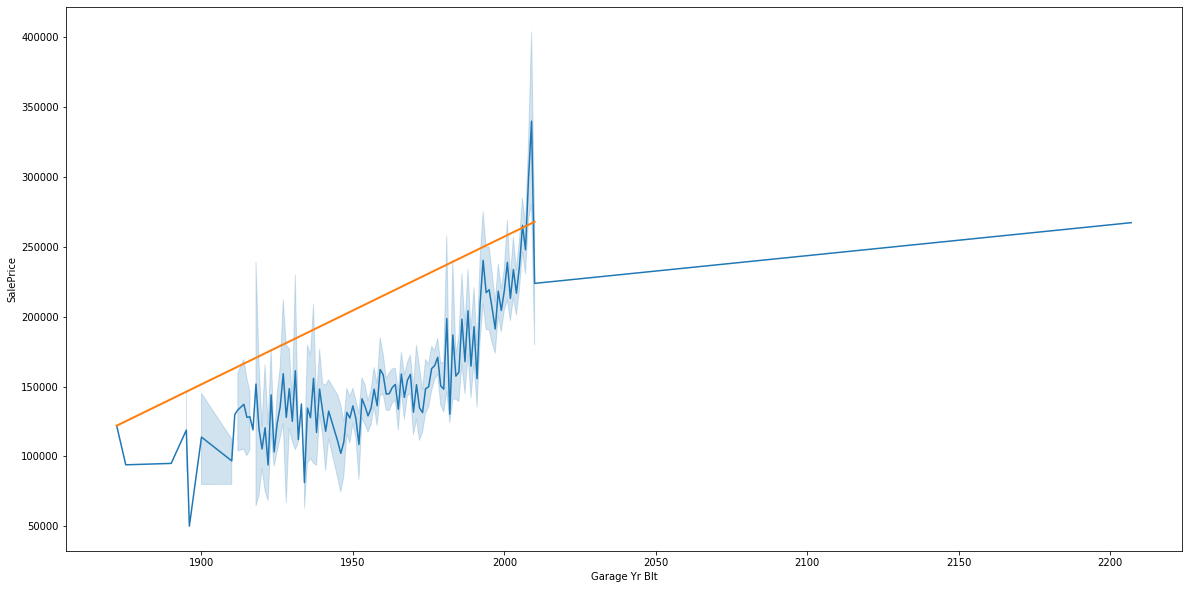

In [114]:
#SalePrice vs Garage Yr Blt
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x = df['Garage Yr Blt'], y = y)
plt.plot([1872, 2010], [122000, 267916], linewidth=2)  ### Clear anomaly in the future garage. Remove before plotting
plt.show()

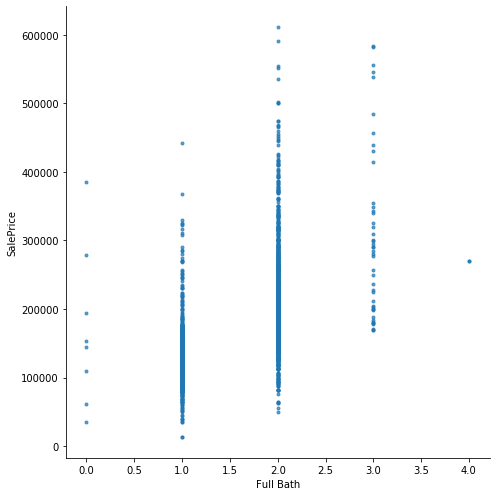

In [115]:
#SalePrice vs Full Bath
scatter(train_df, 'Full Bath', 'SalePrice')

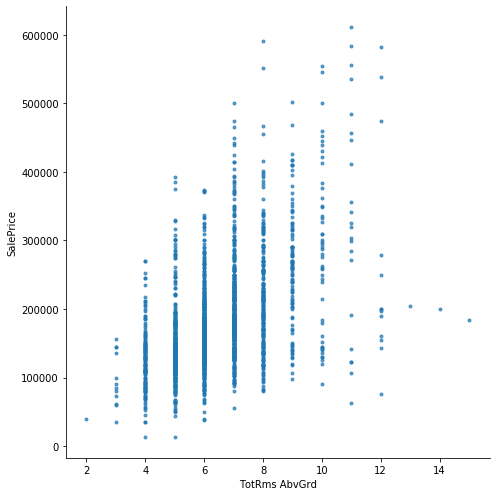

In [116]:
#SalePrice vs TotRms AbvGrd
scatter(train_df, 'TotRms AbvGrd', 'SalePrice')

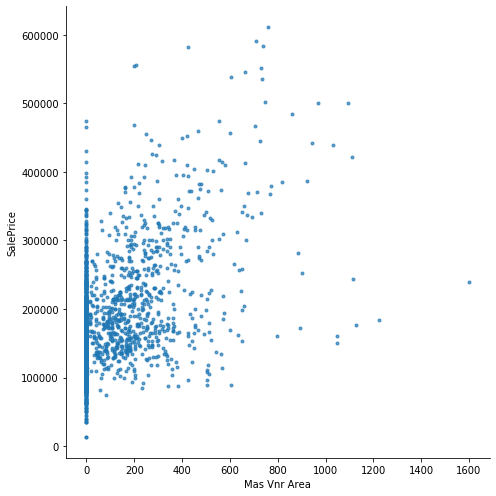

In [117]:
#SalePrice vs Mas Vnr Area
scatter(train_df, 'Mas Vnr Area', 'SalePrice')    ### Anomaly at Max Vnr Area = 1600

By comparing the high correlation variables with SalesPrice identified,
these are the selected features:

Overall Qual

Gr Liv Area

Garage Area

Garage Cars

Total Bsmt SF

Year Built

Year Remod/Add

Garage Yr Blt

Mas Vnr Area


## EDA: Histograms of Continous Variables


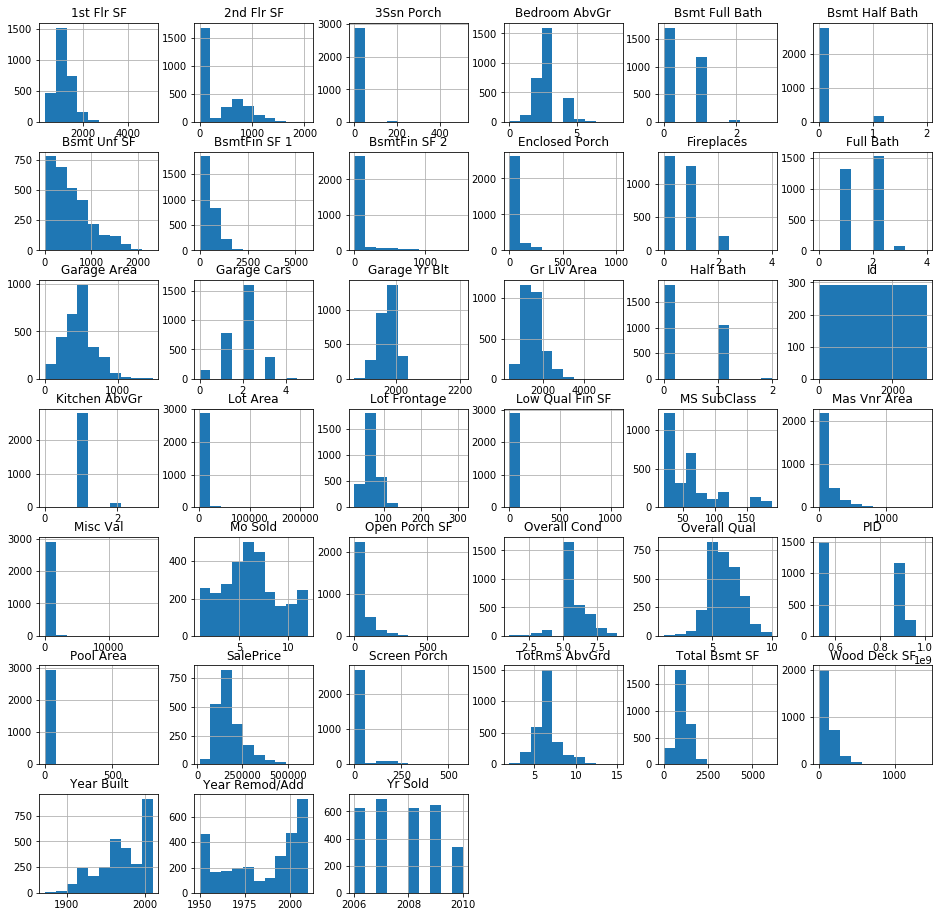

In [118]:
df[numeric_cols].hist(figsize=(16,16));

## EDA: Histograms of Categorical Variables (Ordinal)

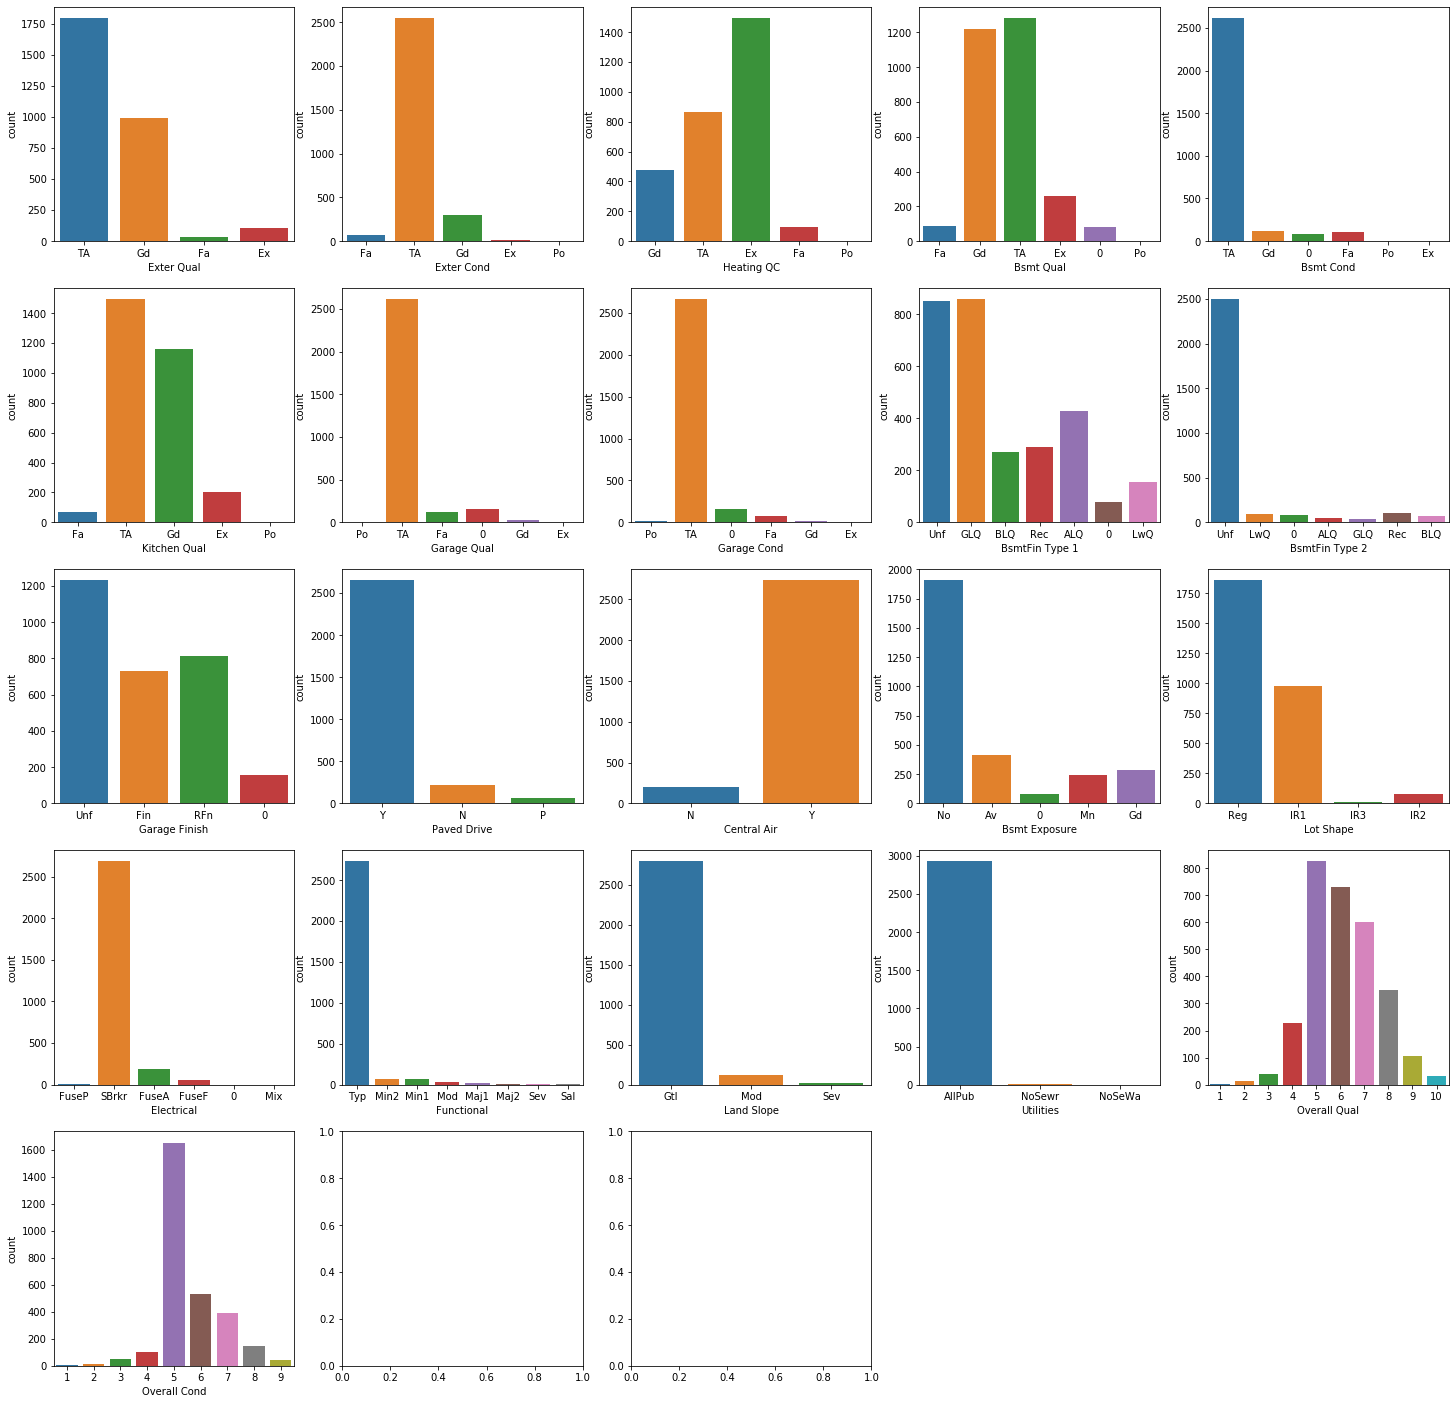

In [119]:
# Plotting the ordinal columns to see their count distribution
fig, ax = plt.subplots(5, 5, figsize=(25, 25))
for variable, subplot in zip(ordinal_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
ax[4,3].set_axis_off()
ax[4,4].set_axis_off()

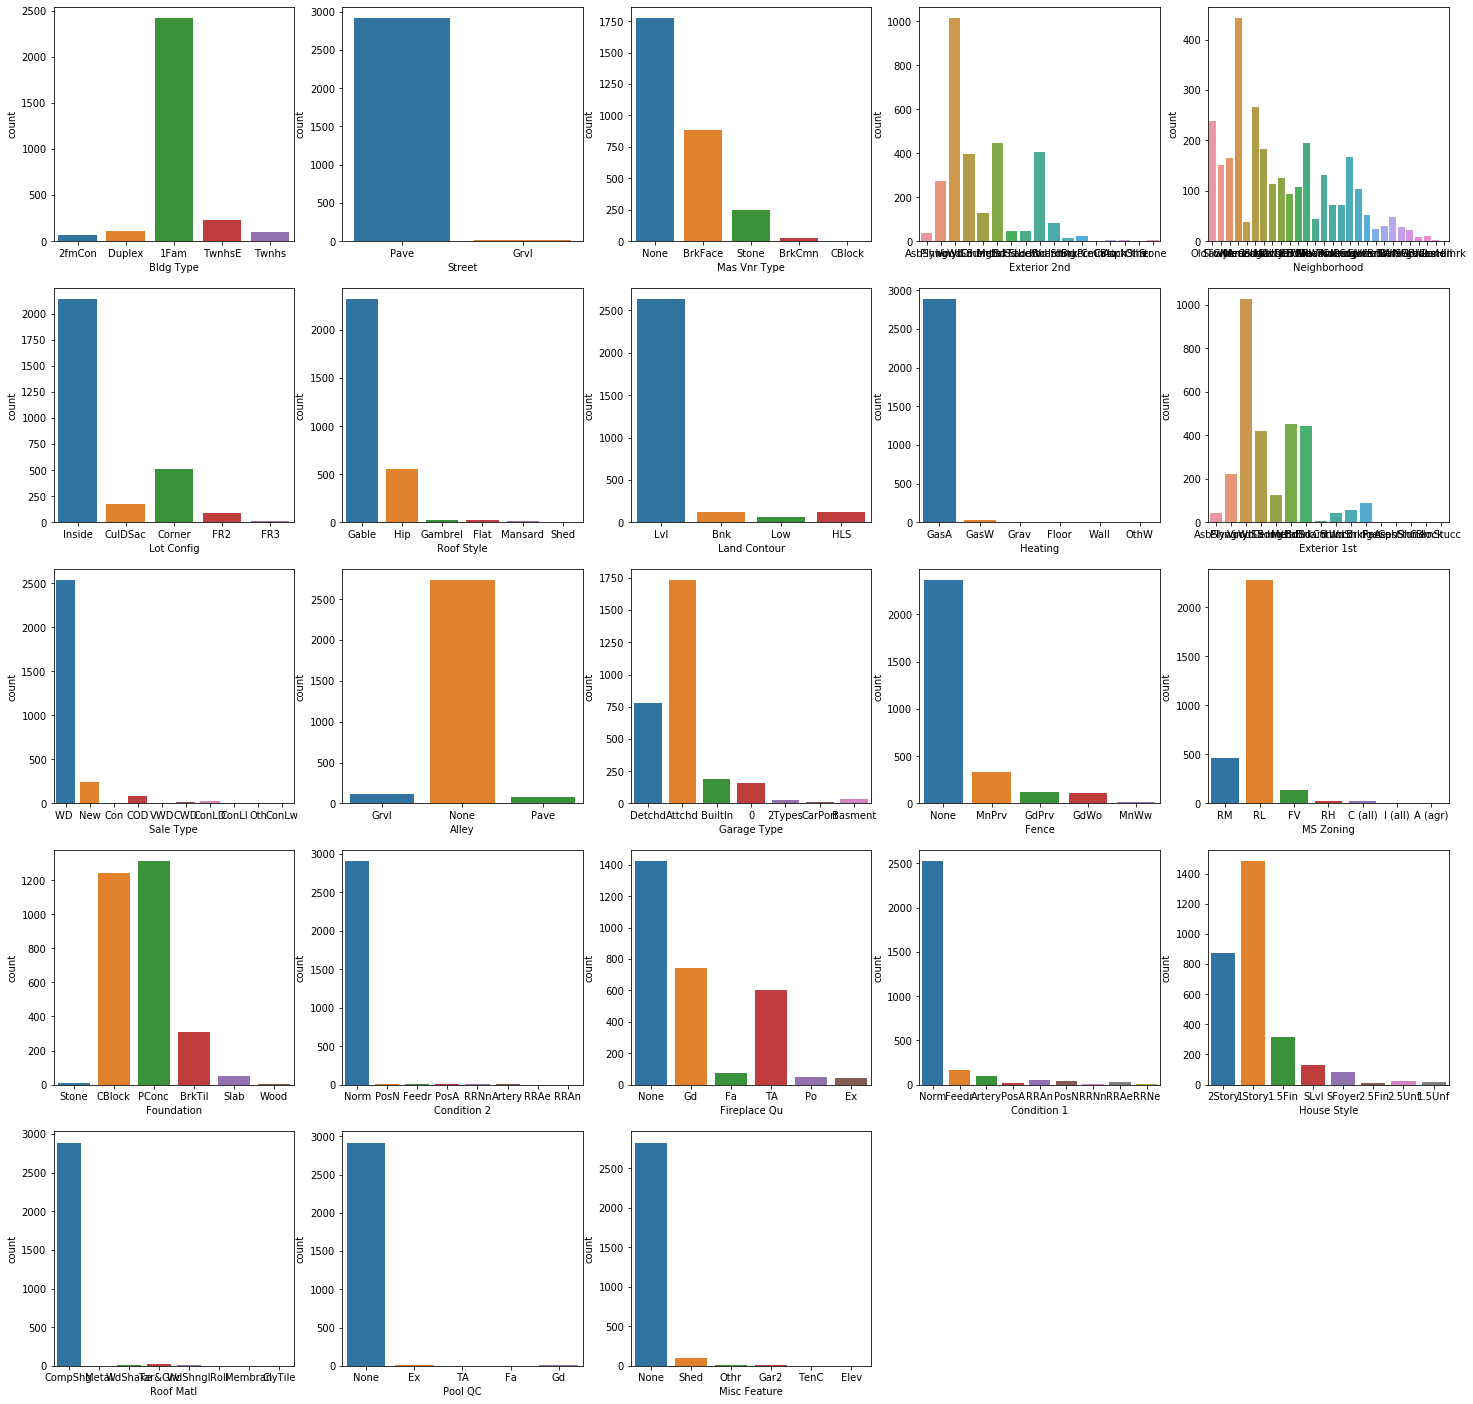

In [120]:
# Plotting the nominal columns to see their count distribution
fig, ax = plt.subplots(5, 5, figsize=(25, 25))
for variable, subplot in zip(nominal_cols, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
ax[4,3].set_axis_off()
ax[4,4].set_axis_off()

fig.savefig('test_4.png', bbox_inches='tight') ### Need to Rotate x axis labels for some graphs.


In [121]:
train_df.to_csv('../project_2/datasets/train_cleaned.csv')
test_df.to_csv('../project_2/datasets/test_cleaned.csv')

<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# # Project 2 - Ames Housing Data and Kaggle Challenge



---

### Objective
I am tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [91]:
train_df = pd.read_csv('../project_2/datasets/train_cleaned.csv')
test_df = pd.read_csv('../project_2/datasets/test_cleaned.csv')

In [92]:
train_df.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,68.0,13517,Pave,None,IR1,...,0,0,None,None,None,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,...,0,0,None,None,None,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,...,0,0,None,None,None,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,...,0,0,None,None,None,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,...,0,0,None,None,None,0,3,2010,WD,138500


In [93]:
test_df.head()

,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,...,0,0,0,None,None,None,0,4,2006,WD
1,1,2718,905108090,90,RL,68.0,9662,Pave,None,IR1,...,0,0,0,None,None,None,0,8,2006,WD
2,2,2414,528218130,60,RL,58.0,17104,Pave,None,IR1,...,0,0,0,None,None,None,0,9,2006,New
3,3,1989,902207150,30,RM,60.0,8520,Pave,None,Reg,...,0,0,0,None,None,None,0,7,2007,WD
4,4,625,535105100,20,RL,68.0,9500,Pave,None,IR1,...,0,185,0,None,None,None,0,7,2009,WD


In [94]:
train_df.drop('Unnamed: 0',axis = 1,inplace=True)
test_df.drop('Unnamed: 0',axis = 1,inplace=True)

In [95]:
df = pd.concat([train_df,test_df],ignore_index=True,sort=False)

In [96]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,68.0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500.0
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,4,2009,WD,220000.0
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,1,2010,WD,109000.0
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,4,2010,WD,174000.0
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,138500.0


In [97]:
df.drop(['Id','PID'],axis=1)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,68.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,None,None,None,0,3,2010,WD,130500.0
1,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,0,None,None,None,0,4,2009,WD,220000.0
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,1,2010,WD,109000.0
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,4,2010,WD,174000.0
4,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,3,2010,WD,138500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,60,RL,80.0,8000,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,11,2007,WD,NaN
2926,60,RL,90.0,14670,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,8,2008,WD,NaN
2927,20,RL,55.0,8250,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2008,WD,NaN
2928,20,RL,60.0,9000,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,GdWo,None,0,5,2007,WD,NaN


In [98]:
# Combining features together

# Overall bathroom facilities available
df['total_bathrooms'] = df['Bsmt Full Bath'] + df['Bsmt Half Bath']*0.5 + df['Full Bath'] + df['Half Bath']*0.5

# Total porch SF available
df['porch_sf'] = df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

# Looking at the age of house when sold since last remodification
df['age']=df['Yr Sold']-df['Year Built']
df['yrs_since_remod']=df['Yr Sold']-df['Year Remod/Add']

In [99]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_bathrooms,porch_sf,age,yrs_since_remod
0,109,533352170,60,RL,68.0,13517,Pave,None,IR1,Lvl,...,None,0,3,2010,WD,130500.0,2.5,44,34,5
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,...,None,0,4,2009,WD,220000.0,3.5,74,13,12
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,...,None,0,1,2010,WD,109000.0,2.0,52,57,3
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,...,None,0,4,2010,WD,174000.0,2.5,100,4,3
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,...,None,0,3,2010,WD,138500.0,2.0,59,110,17


In [100]:
#Assign the Ordinal variables with numbers

df['kitchen_qual'] = df['Kitchen Qual'].replace({'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})
df['exter_qual'] = df['Exter Qual'].replace({'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})
df['garage_qual'] = df['Garage Qual'].replace({'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})
df['garage_cond'] = df['Garage Cond'].replace({'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex':5})
df['paved_drive'] = df['Paved Drive'].replace({'Y': 1, 'P': 2, 'N':3})
df['pool_qc'] = df['Pool QC'].replace({'Fa': 1, 'TA': 2, 'Gd':3, 'Ex':4})
df['fence'] = df['Fence'].replace({'MnWw': 1, 'GdWo': 2, 'MnPrv':3, 'GdPrv':4})
df['garage_finish'] = df['Garage Finish'].replace({'Unf': 0, 'None': 0, 'RFn':1, 'Fin':1})


### I'm not sure if this is the right way to handle ordinal variables.
### You're assuming that there's some sort of linear relationship between the labels, which might not be the case.
### What if, going from 'Po' to 'Ex' in 'kitchen_qual', the sales price increases quadratically?
### Best stick to get_dummies

In [101]:
#Create dummy for MS Zoning

dummy = pd.get_dummies(df['MS Zoning'], drop_first=True, prefix="msz_")
dummy.head()

,msz__C (all),msz__FV,msz__I (all),msz__RH,msz__RL,msz__RM
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [102]:
#Create dummy for Neighbourhood

dummy_2 = pd.get_dummies(df['Neighborhood'], drop_first=True)
dummy_2.head()

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


By comparing the high correlation variables with SalesPrice identified, these are the selected features:

1. Overall Qual
2. Gr Liv Area
3. Garage Area
4. Garage Cars
5. Total Bsmt SF
6. Year Built
7. Year Remod/Add
8. Garage Yr Blt
9. Mas Vnr Area

## Model Prep: Create our features matrix (`X`) and target vector (`y`)


In [103]:
features = ['Overall Qual','Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area']
X = train_df[features]
y = train_df['SalePrice']


### it would have been a good idea to standardise the feature naming. set all column names to lower case and 
### replace all spaces with underscores. 

## Model Prep: Train/test split


In [104]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [105]:
# Standardizing
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Linear Regression

In [106]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
print("LR cross_val_score", cross_val_score(lr, X_train, y_train, cv=5).mean())
print('LR train r2 =', lr.score(X_train, y_train))
print('LR test r2 =', lr.score(X_test, y_test))
mse = mean_squared_error(y_test, lr.predict(X_test))
print('LR MSE =', mse)

LR cross_val_score 0.7637672491770988
LR train r2 = 0.7838376840037005
LR test r2 = 0.8422705872275
LR MSE = 937151749.8260983


## RidgeCV model

In [108]:
ridge = RidgeCV(alphas=np.linspace(.01, 100, 2000))
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([1.0000000e-02, 6.0020010e-02, 1.1004002e-01, ..., 9.9899960e+01,
       9.9949980e+01, 1.0000000e+02]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [109]:
print('Ridge train r2 =', ridge.score(X_train, y_train))
print('Ridge test r2 =', ridge.score(X_test, y_test))
mse = mean_squared_error(y_test, ridge.predict(X_test))
print('Ridge MSE =', mse)

Ridge train r2 = 0.78314247764778
Ridge test r2 = 0.8399465679856384
Ridge MSE = 950959946.1596606


## LassoCV model

In [110]:
lasso = LassoCV(n_alphas=2000,cv=5,n_jobs=-1)
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=2000, n_jobs=-1, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [111]:
# Lasso metrics
print('Lasso train r2 =', lasso.score(X_train, y_train))
print('Lasso test r2 =', lasso.score(X_test, y_test))
mse = mean_squared_error(y_test, lasso.predict(X_test))
print('Lasso MSE =', mse)

Lasso train r2 = 0.7837700268078558
Lasso test r2 = 0.8416879395795691
Lasso MSE = 940613559.8537446


## Model comparison


The best model which have high R-square score and lowest mean square error would be LassoCV and thus used as the model



## Inferential and business recommendations


In [112]:
coef = pd.Series(lasso.coef_, index = (X.columns))

Text(0.5, 1.0, 'Feature importance using Lasso Model')

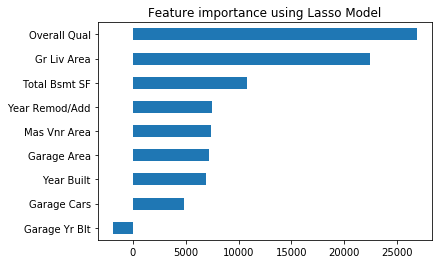

In [113]:
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [114]:
feature_imp = features = ['Overall Qual','Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area']

In [115]:
X = X[feature_imp]
test_submission = test_df[feature_imp]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)


In [117]:
# Standardizing
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)
test_submission_sc = ss.fit_transform(test_submission)

In [118]:
lasso = LassoCV(n_alphas=2000,cv=5,n_jobs=-1)
lasso.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=2000, n_jobs=-1, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [119]:
# Lasso metrics
print('Lasso train r2 =', lasso.score(X_train, y_train))
print('Lasso test r2 =', lasso.score(X_test, y_test))
mse = mean_squared_error(y_test, lasso.predict(X_test))
print('Lasso MSE =', np.sqrt(mse))

Lasso train r2 = 0.7833976943875919
Lasso test r2 = 0.8404051587820135
Lasso MSE = 30793.428224828327


In [120]:
predict = lasso.predict(test_submission_sc)
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice':predict
})

In [121]:
submission.head()


,Id,SalePrice
0,2658,165939.591266
1,2718,204634.292269
2,2414,200164.885349
3,1989,132781.447992
4,625,184911.964627


In [122]:
submission.to_csv('../project_2/datasets/submissions.csv', index=False)


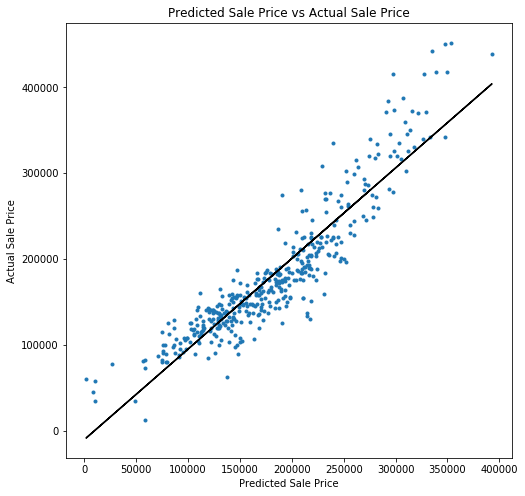

In [125]:
#plt.scatter(x=lasso_overfit_preds, y=y_test, c='r')
plt.figure(figsize=(8,8))
m,b = np.polyfit(x=lasso.predict(X_test), y=y_test, deg=1)
plt.plot(lasso.predict(X_test), y_test, '.')
plt.plot(lasso.predict(X_test), b + m * lasso.predict(X_test), '-', color='k')
frame1 = plt.gca()
plt.xlabel('Predicted Sale Price')
plt.ylabel('Actual Sale Price')
plt.title('Predicted Sale Price vs Actual Sale Price')
plt.show()

In [ ]:
### slight underestimation for low sales prices, and overestimation at high sales prices.
### maybe try a power transform.